In [1]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import os
# from tqdm import tqdm

In [2]:
# publications = ['New York Times', 'CNN', 'Breitbart', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post', 'Atlantic', 'Fox News', 'Buzzfeed News', 'National Review']
# publications = ['AllTheNews']

def importData(publication, model):
    
    filePath = os.getcwd()+'/models/publications'+model+'/'+publication +'/biasresults.txt'
#     filePath = os.getcwd()+'models/'+publication+'/biasresults.txt'
    
    file = open(filePath,'r')
    
    politicalEntities = []
    pos = []
    neu = []
    neg = []
    
    for line in file:
        components = (line.strip()).split(':')
        
        if components[0].strip()=='Political Entity'or components[0].strip()=='Publication' or publication in components[0].strip() or '--' in components[0]:
            print(components[0].strip())
            continue
            
        if len(components) < 4:
            politicalEntities.append(components[0].strip())
            pos.append(float(0))
            neu.append(float(0))
            neg.append(float(0))
        else:
            politicalEntities.append(components[0].strip())
            pos.append(float(components[1].strip()))
            neu.append(float(components[2].strip()))
            neg.append(float(components[3].strip()))

    
    return [politicalEntities,pos,neu,neg]

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def compareSentimentGraphs(publication1, model1, publication2, model2):

    data1 = importData(publication1, model1)
    data2 = importData(publication2, model2)
    
    #Make comparison directory
    try:
        os.mkdir(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2)
    except FileExistsError:
        pass
    
    # Data 
    x = data1[0]
    y1a = data1[1]
    y2a = data1[2]
    y3a = data1[3]
    
    y1b = data2[1]
    y2b = data2[2]
    y3b = data2[3]

    
    # Positive sentiment plot
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    plt.title(publication1 + " and " + publication2 +"\nPositive sentiment comparison Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Magnitude of Positive Sentiment') 
    
    line1 = plt.plot(x, y1a,'r-', alpha=0.7, linestyle='--', marker='.', color='blue', label=publication1)
    line2 = plt.plot(x, y1b,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label=publication2)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2 +'/pos.png', dpi=600)
    plt.show()
    
    # Negative sentiment plot
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    plt.title(publication1 + " and " + publication2 +"\nNegative sentiment comparison Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Magnitude of Negative Sentiment') 
    
    plt.plot(x, y3a,'r-', alpha=0.7, linestyle='--', marker='.', color='blue', label=publication1)
    plt.plot(x, y3b,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label=publication2)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2 +'/neg.png', dpi=600)
    plt.show()
    
    # Neutral sentiment plot
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    plt.title(publication1 + " and " + publication2 +"\nNeutral sentiment comparison Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Magnitude of Neutral Sentiment') 
    
    plt.plot(x, y2a,'r-', alpha=0.7, linestyle='--', marker='.', color='blue', label=publication1)
    plt.plot(x, y2b,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label=publication2)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2 +'/neu.png', dpi=600)
    plt.show()
    
    # Subracted sentiment plot 
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    subValues1 = []
    zippedSent1 = zip(y1a, y3a)
    for y1a, y3a in zippedSent1:
        subValues1.append(y1a-y3a)
        
    subValues2 = []
    zippedSent2 = zip(y1b, y3b)
    for y1b, y3b in zippedSent2:
        subValues2.append(y1b-y3b)
    
    plt.plot(x, subValues1,'r-', alpha=0.5, linestyle='--', marker='.', color='blue', label=publication1)
    plt.plot(x, subValues2,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label=publication2)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.MarkerFaceAlpha = 0.1
    plt.title(publication1 + " and " + publication2 +"\nOverall Sentiment Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Overall Sentiment\n(Positive - Negative Sentiment)')
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2 +'/sub.png', dpi=600)
    plt.show()
    
    # Ordered Overall sentiment plot 
    plt.figure(figsize=(20,5))
    
    sortedsubValues1, arrangedSubValues2, arrangedXValues = zip(*sorted(zip(subValues1, subValues2, x)))

    plt.xticks(rotation=90)
    
    plt.plot(arrangedXValues, sortedsubValues1,'r-', alpha=0.5, linestyle='--', marker='.', color='blue', label=publication1)
    plt.plot(arrangedXValues, arrangedSubValues2,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label=publication2)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.MarkerFaceAlpha = 0.1
    plt.title(publication1 + " and " + publication2 +"\nOverall Sentiment Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Overall Sentiment\n(Positive - Negative Sentiment)')
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/comparisons/'+publication1.replace(" ", "")+model1+publication2.replace(" ", "")+model2 +'/ordsub.png', dpi=600)
    plt.show()


Publication
Political Entity
Buzzfeed News
-----------------------------------------------------------------------------------------
Publication
Political Entity
Breitbart
-----------------------------------------------------------------------------------------


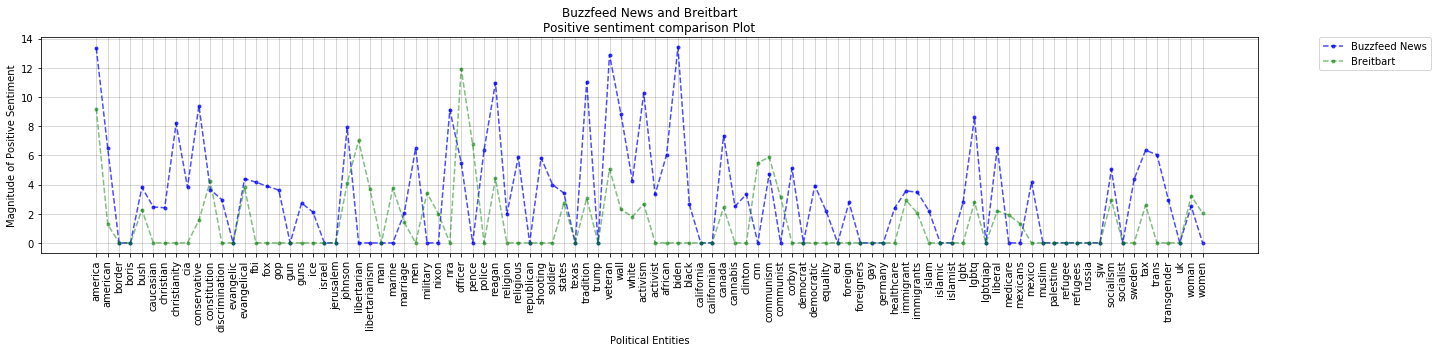

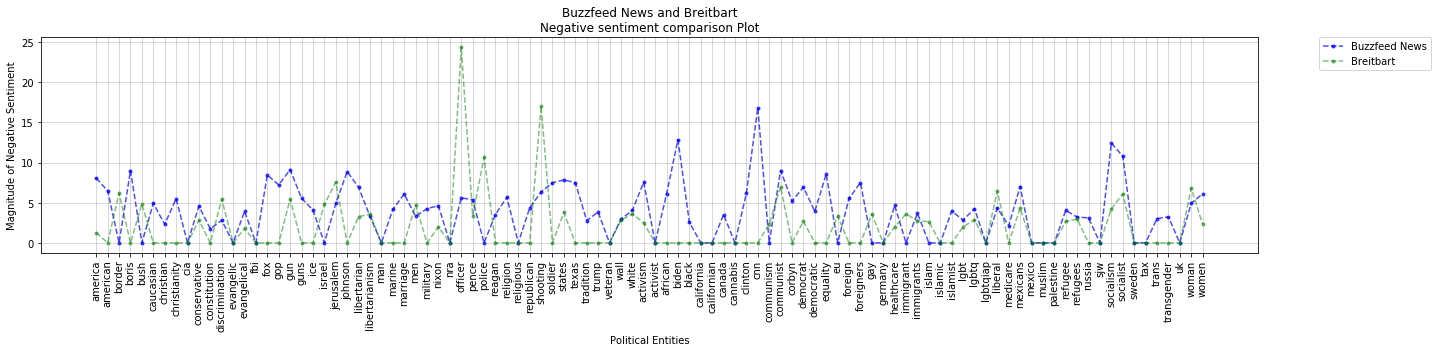

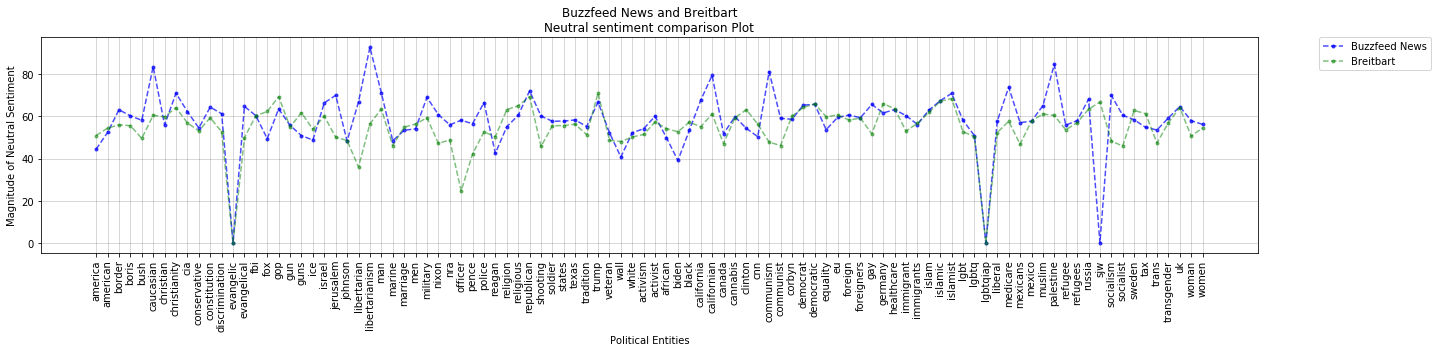

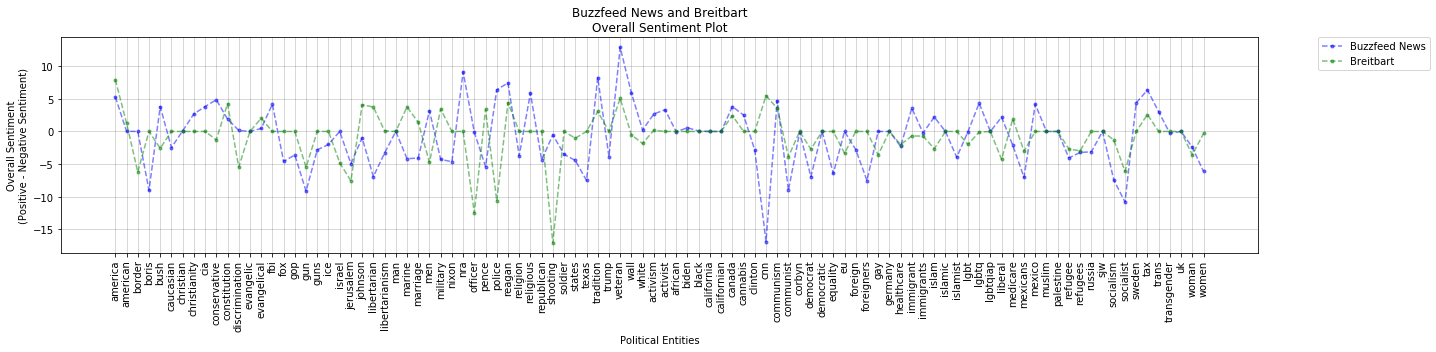

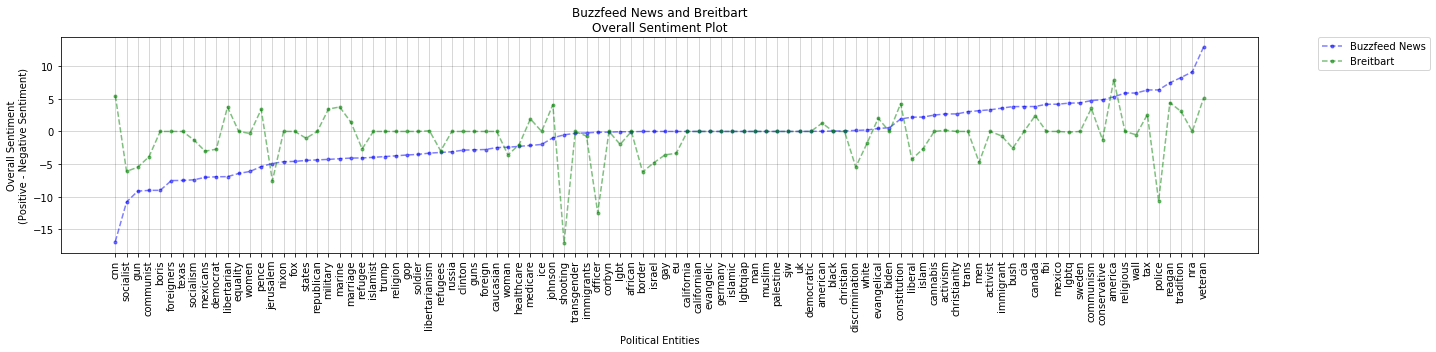

In [4]:
compareSentimentGraphs('Buzzfeed News','Skipgram','Breitbart','Skipgram')